In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Task 1: Urn model for locust scenario

## A: Plotting the data for ∆L(L)

This code simulates swarm behavior in a locust urn model with 50 locusts moving in a unit circle. It measures the average change ΔL in the number of left-moving locusts as a function of L. It identifies equilibrium points where the swarm movement stabilizes.

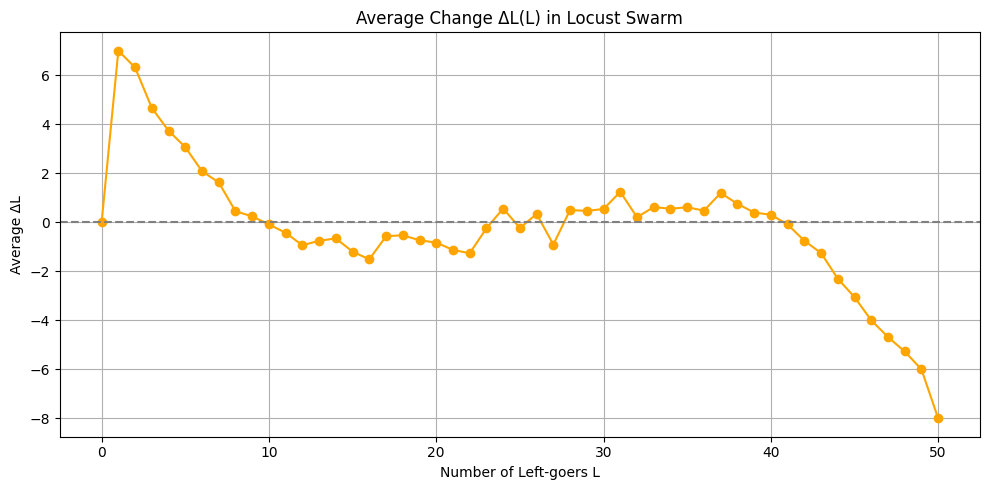

In [6]:
# Parameters
N = 50                   # swarm size
steps_warmup = 100       # stabilization phase
steps_measure = 20       # measurement phase
runs = 500               # number of simulation runs
speed = 0.01
r = 0.045
P = 0.15

# Arrays to store sum and counts of delta L per L
delta_sum = np.zeros(N + 1)
count = np.zeros(N + 1)

for _ in range(runs):
    positions = np.random.rand(N)
    directions = np.random.choice([-1, 1], size=N)

    # --- Warm-up phase ---
    for _ in range(steps_warmup):
        for i in range(N):
            dists = np.abs(positions - positions[i])
            dists = np.minimum(dists, 1 - dists)
            neighbors = (dists < r) & (dists > 0)
            neighbor_dirs = directions[neighbors]
            if len(neighbor_dirs) > 0:
                if np.sum(neighbor_dirs == -directions[i]) > len(neighbor_dirs) / 2:
                    directions[i] = -directions[i]
                elif np.random.rand() < P:
                    directions[i] = -directions[i]
            elif np.random.rand() < P:
                directions[i] = -directions[i]
        positions = (positions + speed * directions) % 1

    # --- Measurement phase ---
    for _ in range(steps_measure):
        L_prev = np.sum(directions == -1)

        for i in range(N):
            dists = np.abs(positions - positions[i])
            dists = np.minimum(dists, 1 - dists)
            neighbors = (dists < r) & (dists > 0)
            neighbor_dirs = directions[neighbors]
            if len(neighbor_dirs) > 0:
                if np.sum(neighbor_dirs == -directions[i]) > len(neighbor_dirs) / 2:
                    directions[i] = -directions[i]
                elif np.random.rand() < P:
                    directions[i] = -directions[i]
            elif np.random.rand() < P:
                directions[i] = -directions[i]

        positions = (positions + speed * directions) % 1
        L_new = np.sum(directions == -1)

        delta = L_new - L_prev
        delta_sum[L_prev] += delta
        count[L_prev] += 1

# Average delta L
with np.errstate(divide='ignore', invalid='ignore'):
    avg_delta = np.where(count > 0, delta_sum / count, 0)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(N + 1), avg_delta, marker='o', color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Average Change ΔL(L) in Locust Swarm")
plt.xlabel("Number of Left-goers L")
plt.ylabel("Average ΔL")
plt.grid(True)
plt.tight_layout()
plt.show()


The output plot shows the equilibrium points L*, where swarm direction stabilizes on average (ΔL(L∗) = 0).

Mathematically, 

ΔL(L∗) is the average change in no. of left going locusts and when ΔL(L∗)=0, it means that the these left goers do not change at that point. Thus, L* can be considered as the stabalizing point of the system.

Domain-specific: -------

## B: Fitting the model

The code fits the theoretical urn model to simulated locust swarm data. It estimates how the average change in the proportion of left-goers Δs(s) depends on swarm feedback intensity φ and a scaling constant c.


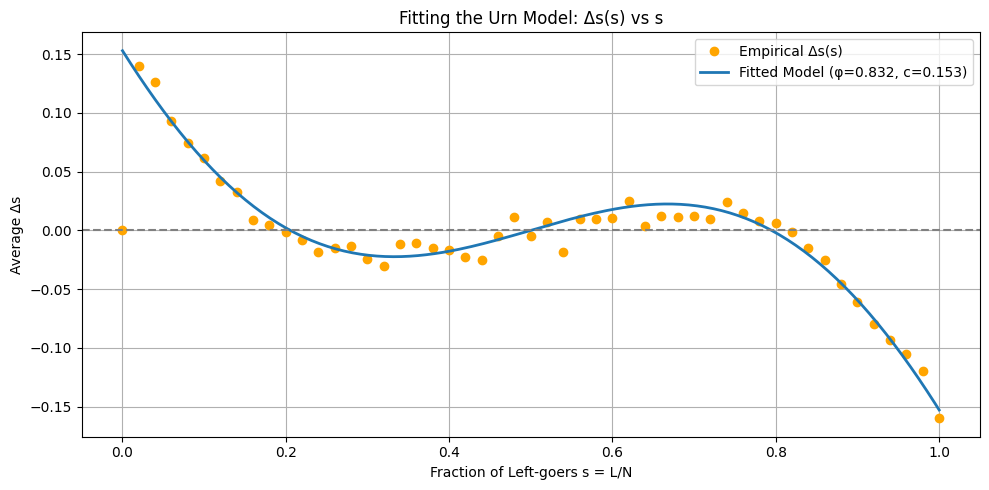

In [ ]:
L_vals = np.arange(N + 1)
s_vals = L_vals / N
delta_s_empirical = avg_delta / N  # Δs = ΔL / N

def delta_s_model(s, phi, c):
    P_FB = phi * np.sin(np.pi * s)
    return 4 * c * (P_FB - 0.5) * (s - 0.5)

valid_indices = count > 0  # use only bins with measurements
s_data = s_vals[valid_indices]
delta_s_data = delta_s_empirical[valid_indices]

popt, _ = curve_fit(delta_s_model, s_data, delta_s_data, bounds=([0, 0], [1, 10]))
phi_opt, c_opt = popt

s_fit = np.linspace(0, 1, 200)
delta_s_fit = delta_s_model(s_fit, phi_opt, c_opt)

plt.figure(figsize=(10, 5))
plt.plot(s_vals, delta_s_empirical, 'o', label='Empirical Δs(s)', color='orange')
plt.plot(s_fit, delta_s_fit, label=f'Fitted Model (φ={phi_opt:.3f}, c={c_opt:.3f})', linewidth=2)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Fitting the Urn Model: Δs(s) vs s")
plt.xlabel("Fraction of Left-goers s = L/N")
plt.ylabel("Average Δs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In this output plot the orange dots represent the emperical data and the blue line represents the curve of fitted urn model. The x-axis shows the fraction of left-goers s=L/N, and the y-axis shows the average change Δs. The points where the curve crosses zero indicate swarm equilibrium states.

## C: 

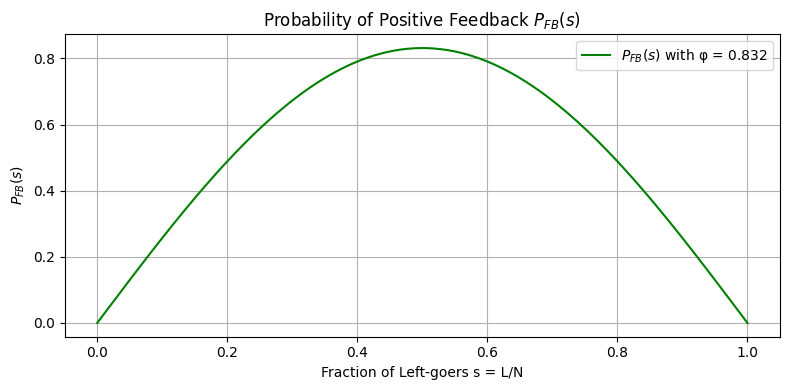

In [ ]:
# To be reviewed***
#  Plot probability of positive feedback P_FB(s) using fitted φ
s_vals_fb = np.linspace(0, 1, 200)
P_FB_vals = phi_opt * np.sin(np.pi * s_vals_fb)

plt.figure(figsize=(8, 4))
plt.plot(s_vals_fb, P_FB_vals, label=f'$P_{{FB}}(s)$ with φ = {phi_opt:.3f}', color='green')
plt.title("Probability of Positive Feedback $P_{FB}(s)$")
plt.xlabel("Fraction of Left-goers s = L/N")
plt.ylabel("$P_{FB}(s)$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
